In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#using 2 antennas
dataset = pd.read_csv('human_walking_direction_irina_422.csv').drop('Unnamed: 0',axis=1)

1. We collected 100 packets every 5 secs for each behavior. 
2. 2000 samples for left, right, and no_person. 1000 samples for up.
3. We have 56 subcarrier and we will use 30 subcarriers
4. We have 2 * 2 antennas. So, we have four csi values at receiver (1_1, 1_2, 2_1, 2_2)=>(i_j), i for receiver and j for transmitter.
5. I will loop for each subcarrier and select 100 values for packet num for example subcarrier 0 contains 2000 values for no of packets, So 2000/100-> 20 behavior.
6. We have 30 subcarriers, then we will have 20*30=600 rows for left, right, and no person but for up 1000/100 * 30=300 therefore the total number of rows=600+600+600+300=2100
7. for columns, We have 100 packet for each antenna pair then 100*4=400 therefore We have 400 amplitudes, 400 phases and label col then the total number of columns=801
8. Therefore for each row we have the amplitudes and phases for 100 packets (one behavior)



1. s_n -> subcarrier num
2. a_n -> antenna_num
3. d_n -> data_num
4. tp_n ->  total number of packets for each behavior
5. tb_n ->  total number of behaviors for each activty
6. N  -> activities number
7. TR_n -> total number of rows
8. TC_n -> total number of columns
9. tb_n= d_n/tp_n    ->          (tb_n= 2000/100 =20   , tb_n= 1000/100 =10)
10. TR_n= tb_n*s_n*N   ->         (TR_n = 20*30*3 + 10*30*1=1800+300=2100)
11. TC_n= (tp_n * a_n  * 2) + 1  ->   (TC_n= (100*4*2)+1 = 801)
12. DS_n = TR_n * TC_n ->  (2100*801)

 

In [3]:
dataset.head()

,phase antenna1_1:0,phase antenna1_1:1,phase antenna1_1:2,phase antenna1_1:3,phase antenna1_1:4,phase antenna1_1:5,phase antenna1_1:6,phase antenna1_1:7,phase antenna1_1:8,phase antenna1_1:9,...,phase antenna2_2:391,phase antenna2_2:392,phase antenna2_2:393,phase antenna2_2:394,phase antenna2_2:395,phase antenna2_2:396,phase antenna2_2:397,phase antenna2_2:398,phase antenna2_2:399,label
0,-0.135989,-0.123456,-0.602276,-1.010242,-0.803022,0.261769,-0.387348,0.085068,-0.392840,-0.052538,...,1.020146,0.507133,5.597639,1.187952,0.638021,1.983159,0.585491,0.026738,1.235651,left_direction
1,-1.320614,0.000260,-1.091981,-0.799338,-0.602386,-0.965318,-0.998496,0.065750,-0.756615,-1.250358,...,-2.500184,1.548646,0.299124,1.820368,1.292328,1.917862,2.692341,1.429050,1.825667,left_direction
2,-0.075039,-0.117488,-0.807043,-0.290339,-0.681354,-0.816196,-0.950918,-1.114059,-0.195506,-0.322647,...,1.409016,0.824287,4.311843,2.534525,1.826968,1.234401,1.300331,-0.040707,0.656702,left_direction
3,-0.726282,-0.119237,-0.579648,-0.864660,-0.169481,-0.021536,-0.783438,-0.019197,-0.214895,-0.672793,...,0.895448,0.761684,1.861546,6.118136,-2.391438,3.496893,1.536810,1.301150,0.665676,left_direction
4,-0.694415,-0.833694,0.211327,0.163703,-0.645682,-1.135307,-0.468908,-0.306828,-1.111404,-0.808572,...,-0.306435,1.964336,0.991468,0.505560,1.556059,0.936086,2.437177,4.865827,-7.813690,left_direction


C:\Users\hanan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


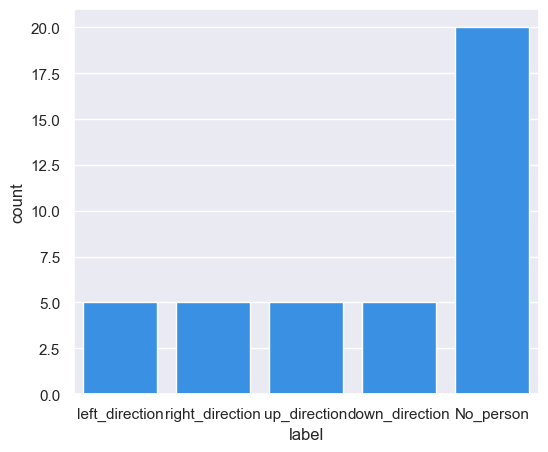

In [4]:
import seaborn as sns

sns.set(color_codes=True)

plt.figure(0, (6, 5))
sns_plot = sns.countplot(dataset['label'], color="dodgerblue", label="Compact")


# Train the dataset

In [5]:
#Data encoding: to convert categorical features to numberical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['label']=label_encoder.fit_transform(dataset['label'])

In [6]:
dataset

,phase antenna1_1:0,phase antenna1_1:1,phase antenna1_1:2,phase antenna1_1:3,phase antenna1_1:4,phase antenna1_1:5,phase antenna1_1:6,phase antenna1_1:7,phase antenna1_1:8,phase antenna1_1:9,...,phase antenna2_2:391,phase antenna2_2:392,phase antenna2_2:393,phase antenna2_2:394,phase antenna2_2:395,phase antenna2_2:396,phase antenna2_2:397,phase antenna2_2:398,phase antenna2_2:399,label
0,-0.135989,-0.123456,-0.602276,-1.010242,-0.803022,0.261769,-0.387348,0.085068,-0.392840,-0.052538,...,1.020146,0.507133,5.597639,1.187952,0.638021,1.983159,0.585491,0.026738,1.235651,2
1,-1.320614,0.000260,-1.091981,-0.799338,-0.602386,-0.965318,-0.998496,0.065750,-0.756615,-1.250358,...,-2.500184,1.548646,0.299124,1.820368,1.292328,1.917862,2.692341,1.429050,1.825667,2
2,-0.075039,-0.117488,-0.807043,-0.290339,-0.681354,-0.816196,-0.950918,-1.114059,-0.195506,-0.322647,...,1.409016,0.824287,4.311843,2.534525,1.826968,1.234401,1.300331,-0.040707,0.656702,2
3,-0.726282,-0.119237,-0.579648,-0.864660,-0.169481,-0.021536,-0.783438,-0.019197,-0.214895,-0.672793,...,0.895448,0.761684,1.861546,6.118136,-2.391438,3.496893,1.536810,1.301150,0.665676,2
4,-0.694415,-0.833694,0.211327,0.163703,-0.645682,-1.135307,-0.468908,-0.306828,-1.111404,-0.808572,...,-0.306435,1.964336,0.991468,0.505560,1.556059,0.936086,2.437177,4.865827,-7.813690,2
5,-0.138549,0.007581,0.175757,-1.024114,0.213220,-0.727539,-0.723615,-0.933927,-0.695015,-0.432796,...,1.238846,0.648146,1.061247,5.081921,-0.690661,0.930071,-1.558550,2.020323,5.183907,3
6,-0.293882,-0.617331,-0.108504,-0.247957,-0.449019,-0.478973,-0.837047,-0.868238,-0.635654,-0.488416,...,4.248224,2.201443,1.701503,-4.001079,11.906699,5.026748,2.998194,1.926490,1.527281,3
7,-1.134494,0.208598,-0.002356,-0.489561,-1.199052,0.052284,-0.209143,-0.083522,0.100115,-0.030155,...,-5.521267,1.132529,0.112917,0.755703,1.395068,3.049314,2.119899,0.201844,0.877491,3
8,-0.590645,-0.988724,-0.116937,-1.121823,-0.041042,0.305692,-0.496927,0.218432,-0.962160,0.503711,...,2.176242,2.060272,8.073385,1.439478,-0.444464,2.799122,1.909592,1.679126,-1.670540,3
9,-0.490806,0.035819,0.150070,0.123645,-0.046327,-0.317758,0.591577,0.086183,-0.488125,-0.813533,...,1.308783,2.024814,-0.398175,5.298093,3.136041,1.044568,-0.205344,1.119112,2.686903,3


In [7]:
dataset['label'].unique()

array([2, 3, 4, 1, 0])

In [8]:
y=dataset['label']

In [9]:
X=dataset.drop('label',axis=1)

In [10]:
y

0     2
1     2
2     2
3     2
4     2
5     3
6     3
7     3
8     3
9     3
10    4
11    4
12    4
13    4
14    4
15    1
16    1
17    1
18    1
19    1
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
Name: label, dtype: int32

In [11]:
#Trainset Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y,  test_size=0.5,random_state=123)

In [12]:
X_train.shape

(20, 1600)

In [13]:
X_test.shape

(20, 1600)

 2      3     4    1    0:
left   right  up  down  No

# classification using ML models

In [14]:
RF_Accuracy=[]
SVM_Accuracy=[]
KNN_Accuracy=[]

# 1. Random Forest Classifier

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.ensemble import RandomForestClassifier

classifier_rfc=RandomForestClassifier(max_depth=12)
classifier_rfc.fit(X_train,y_train)
y_pred_rfc=classifier_rfc.predict(X_train)
print("the accuracy of training data: ", accuracy_score(y_train,y_pred_rfc))
y_pred_rfc_test=classifier_rfc.predict(X_test)
print("the accuracy of testing data:  ", accuracy_score(y_test,y_pred_rfc_test))
RF_Accuracy.append(accuracy_score(y_test,y_pred_rfc_test))

the accuracy of training data:  1.0
the accuracy of testing data:   0.5


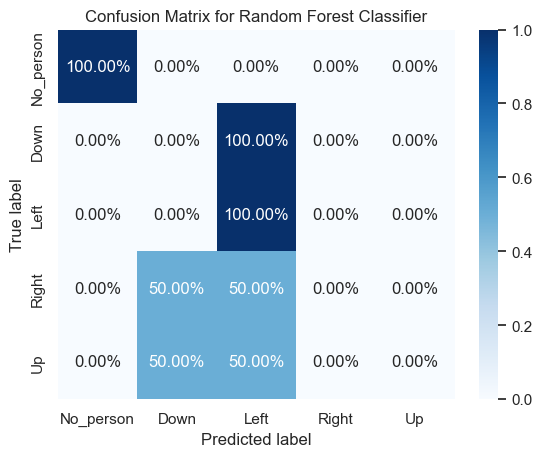

In [17]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc_test, normalize='true')
class_names = ["No_person","Down","Left","Right", "Up"]

# Plot confusion matrix as heatmap

sns.heatmap(cm_rfc, annot=True, cmap="Blues", fmt=".2%", vmin=0, vmax=1,xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [18]:
precision_rfc = precision_score(y_test, y_pred_rfc_test, average='micro')
recall_rfc = recall_score(y_test, y_pred_rfc_test, average='micro')
f1_rfc = f1_score(y_test, y_pred_rfc_test, average='micro')
accuracy_rfc = accuracy_score(y_test, y_pred_rfc_test)

print('Different metrics for testing data')
print("Precision: ", precision_rfc)
print("Recall: ", recall_rfc)
print("F1 score: ", f1_rfc)
print("Accuracy: ", accuracy_rfc)

Different metrics for testing data
Precision:  0.5
Recall:  0.5
F1 score:  0.5
Accuracy:  0.5


In [19]:
report_rfc = classification_report(y_test, y_pred_rfc_test)
print("Classification report for Random Forest:")
print(report_rfc)

Classification report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.00      0.00      0.00         2
           2       0.25      1.00      0.40         2
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         4

    accuracy                           0.50        20
   macro avg       0.25      0.40      0.28        20
weighted avg       0.42      0.50      0.44        20



C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Random Forest')

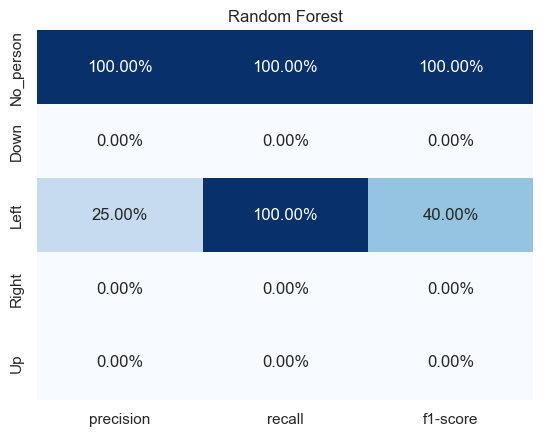

In [20]:
report_rfc = classification_report(y_test, y_pred_rfc_test, output_dict=True)
report_rfc_df = pd.DataFrame(report_rfc).transpose()
class_names = ["No_person","Down","Left","Right", "Up"]
report_rfc_df=report_rfc_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=0)
report_rfc_df=report_rfc_df.drop(['support'], axis=1)
sns.heatmap(report_rfc_df, annot=True, cmap='Blues', fmt='.2%', cbar=False, yticklabels=class_names)
plt.title("Random Forest")


# 1.2 Support Vector Machine

In [21]:
from sklearn import svm
classifier_svm = svm.SVC(kernel='linear')
classifier_svm.fit(X_train,y_train)
y_pred_svm=classifier_svm.predict(X_train)
print("the accuracy of training data: ", accuracy_score(y_train,y_pred_svm))
y_pred_svm_test=classifier_svm.predict(X_test)
print("the accuracy of testing data:  ", accuracy_score(y_test,y_pred_svm_test))
SVM_Accuracy.append(accuracy_score(y_test,y_pred_svm_test))

the accuracy of training data:  1.0
the accuracy of testing data:   0.5


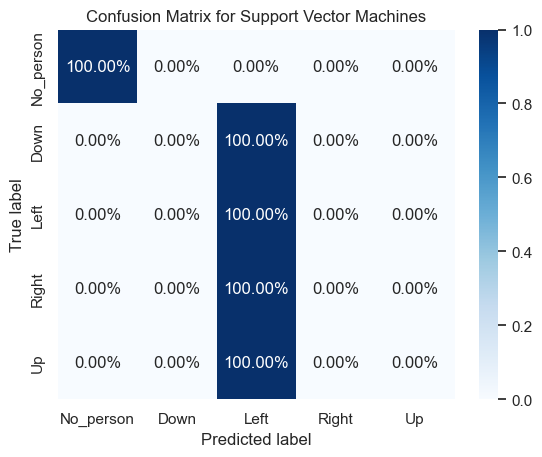

In [22]:
cm_svm = confusion_matrix(y_test, y_pred_svm_test, normalize='true')
class_names = ["No_person","Down","Left","Right", "Up"]

# Plot confusion matrix as heatmap

sns.heatmap(cm_svm, annot=True, cmap="Blues", fmt=".2%", vmin=0, vmax=1,xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for Support Vector Machines")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [23]:
precision_svm = precision_score(y_test, y_pred_svm_test, average='micro')
recall_svm = recall_score(y_test, y_pred_svm_test, average='micro')
f1_svm = f1_score(y_test, y_pred_svm_test, average='micro')
accuracy_svm = accuracy_score(y_test, y_pred_svm_test)

print('Different metrics for testing data')
print("Precision: ", precision_svm)
print("Recall: ", recall_svm)
print("F1 score: ", f1_svm)
print("Accuracy: ", accuracy_svm)

Different metrics for testing data
Precision:  0.5
Recall:  0.5
F1 score:  0.5
Accuracy:  0.5


In [24]:
report_svm = classification_report(y_test, y_pred_svm_test)
print("Classification report for Support Vector Machines:")
print(report_svm)

Classification report for Support Vector Machines:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.00      0.00      0.00         2
           2       0.17      1.00      0.29         2
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         4

    accuracy                           0.50        20
   macro avg       0.23      0.40      0.26        20
weighted avg       0.42      0.50      0.43        20



C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Support Vector Machines')

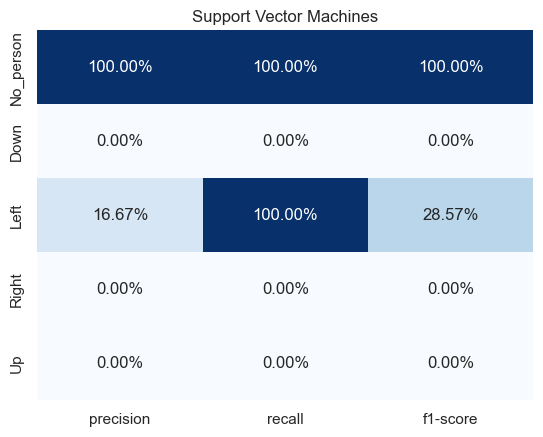

In [25]:
report_svm = classification_report(y_test, y_pred_svm_test, output_dict=True)
report_svm_df = pd.DataFrame(report_svm).transpose()
class_names = ["No_person","Down","Left","Right", "Up"]
report_svm_df=report_svm_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=0)
report_svm_df=report_svm_df.drop(['support'], axis=1)
sns.heatmap(report_svm_df, annot=True, cmap='Blues', fmt='.2%', cbar=False, yticklabels=class_names)
plt.title("Support Vector Machines")


# 1.3 K-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=3,weights='distance',p=1)
classifier_knn.fit(X_train,y_train)
y_pred_knn=classifier_knn.predict(X_train)
print("the accuracy of training data: ", accuracy_score(y_train,y_pred_knn))
y_pred_knn_test=classifier_knn.predict(X_test)
print("the accuracy of testing data:  ", accuracy_score(y_test,y_pred_knn_test))
KNN_Accuracy.append(accuracy_score(y_test,y_pred_knn_test))

the accuracy of training data:  1.0
the accuracy of testing data:   0.35


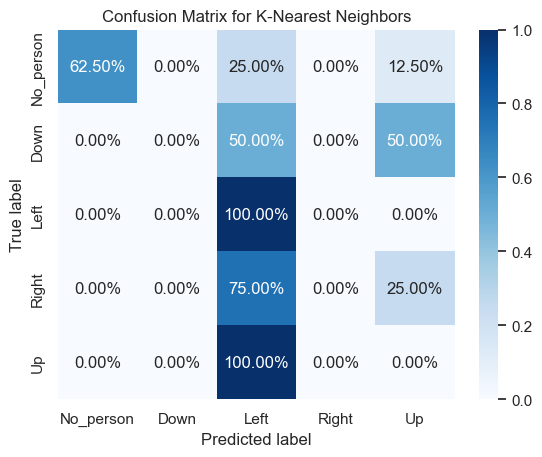

In [27]:
cm_knn = confusion_matrix(y_test, y_pred_knn_test, normalize='true')
class_names = ["No_person","Down","Left","Right", "Up"]

# Plot confusion matrix as heatmap

sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt=".2%", vmin=0, vmax=1,xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [28]:
precision_knn = precision_score(y_test, y_pred_knn_test, average='micro')
recall_knn = recall_score(y_test, y_pred_knn_test, average='micro')
f1_knn = f1_score(y_test, y_pred_knn_test, average='micro')
accuracy_knn = accuracy_score(y_test, y_pred_knn_test)

print('Different metrics for testing data')
print("Precision: ", precision_knn)
print("Recall: ", recall_knn)
print("F1 score: ", f1_knn)
print("Accuracy: ", accuracy_knn)

Different metrics for testing data
Precision:  0.35
Recall:  0.35
F1 score:  0.35
Accuracy:  0.35


In [29]:
report_knn = classification_report(y_test, y_pred_knn_test)
print("Classification report for K-Nearest Neighbors:")
print(report_knn)

Classification report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.00      0.00      0.00         2
           2       0.17      1.00      0.29         2
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         4

    accuracy                           0.35        20
   macro avg       0.23      0.33      0.21        20
weighted avg       0.42      0.35      0.34        20



C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'K-Nearest Neighbors')

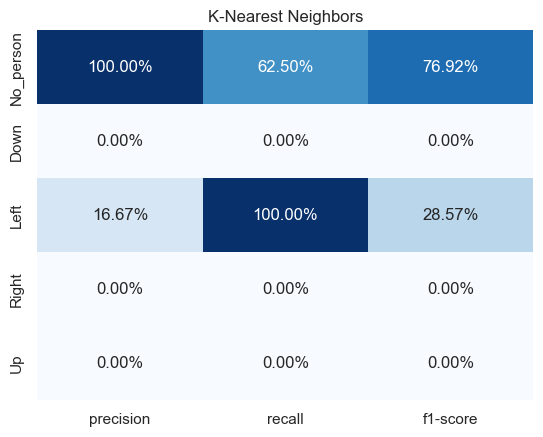

In [30]:
report_knn = classification_report(y_test, y_pred_knn_test, output_dict=True)
report_knn_df = pd.DataFrame(report_knn).transpose()
class_names = ["No_person","Down","Left","Right", "Up"]
report_knn_df=report_knn_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=0)
report_knn_df=report_knn_df.drop(['support'], axis=1)
sns.heatmap(report_knn_df, annot=True, cmap='Blues', fmt='.2%', cbar=False, yticklabels=class_names)
plt.title("K-Nearest Neighbors")


In [31]:
RF_accuracy=pd.DataFrame(data=RF_Accuracy[0:],
                columns=['RF'])

SVM_accuracy=pd.DataFrame(data=SVM_Accuracy[0:],
                columns=['SVM'])

KNN_accuracy=pd.DataFrame(data=KNN_Accuracy[0:],
                columns=['KNN'])
df_accuracy_new = pd.concat([RF_accuracy,SVM_accuracy,KNN_accuracy], axis=1)
df_accuracy_existing = pd.read_csv('human_walking_direction_df_accuracy_all_volunteers.csv').drop('Unnamed: 0',axis=1)
df_accuracy = df_accuracy_existing.append(df_accuracy_new, ignore_index=True)
df_accuracy

C:\Users\hanan\AppData\Local\Temp\ipykernel_14044\3372602396.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_accuracy = df_accuracy_existing.append(df_accuracy_new, ignore_index=True)


,RF,SVM,KNN
0,0.450000,0.450000,0.500000
1,0.550000,0.600000,0.700000
2,0.600000,0.550000,0.500000
3,0.550000,0.550000,0.500000
4,0.380952,0.428571,0.380952
5,0.500000,0.550000,0.500000
6,0.523810,0.571429,0.571429
7,0.450000,0.550000,0.600000
8,0.476190,0.380952,0.428571
9,0.523810,0.571429,0.571429


In [32]:
df_accuracy

,RF,SVM,KNN
0,0.450000,0.450000,0.500000
1,0.550000,0.600000,0.700000
2,0.600000,0.550000,0.500000
3,0.550000,0.550000,0.500000
4,0.380952,0.428571,0.380952
5,0.500000,0.550000,0.500000
6,0.523810,0.571429,0.571429
7,0.450000,0.550000,0.600000
8,0.476190,0.380952,0.428571
9,0.523810,0.571429,0.571429


In [33]:
df_accuracy.to_csv(r'human_walking_direction_df_accuracy_all_volunteers.csv')